# Classifying Fashion-MNIST

Now it's your turn to build and train a neural network. You'll be using the [Fashion-MNIST dataset](https://github.com/zalandoresearch/fashion-mnist), a drop-in replacement for the MNIST dataset. MNIST is actually quite trivial with neural networks where you can easily achieve better than 97% accuracy. Fashion-MNIST is a set of 28x28 greyscale images of clothes. It's more complex than MNIST, so it's a better representation of the actual performance of your network, and a better representation of datasets you'll use in the real world.

<img src='assets/fashion-mnist-sprite.png' width=500px>

In this notebook, you'll build your own neural network. For the most part, you could just copy and paste the code from Part 3, but you wouldn't be learning. It's important for you to write the code yourself and get it to work. Feel free to consult the previous notebook though as you work through this.

First off, let's load the dataset through torchvision.

Here we can see one of the images.

In [26]:
import torch
from torchvision import datasets, transforms
import helper
####
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import numpy as np
import time
import torch
from torch import nn
from torch import optim
import torch.nn.functional as F
from torchvision import datasets, transforms
import helper

Epoch 1/5 - Loss: 0.999720632902849
Epoch 2/5 - Loss: 0.5530387288980139
Epoch 3/5 - Loss: 0.48591215451007713
Epoch 4/5 - Loss: 0.4513020441412672
Epoch 5/5 - Loss: 0.4282087372468987


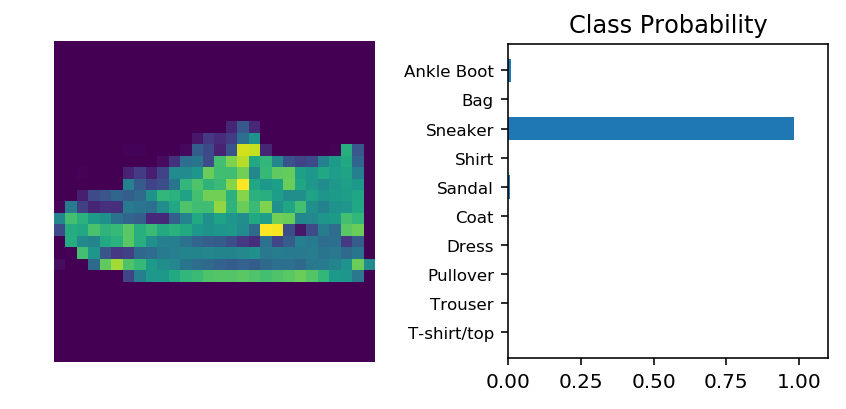

In [27]:
# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
# Download and load the training data
trainset = datasets.FashionMNIST('F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
# Download and load the test data
testset = datasets.FashionMNIST('F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)
#See items
image, label = next(iter(trainloader))
helper.imshow(image[0,:]);

#Build Neural Network
"""Here you should define your network. As with MNIST, each image is 28x28 which is a total of 784 pixels, 
and there are 10 classes. You should include at least one hidden layer. We suggest you use ReLU activations 
for the layers and to return the logits from the forward pass. It's up to you how many layers you add and the 
size of those layers."""
# TODO: Define your network architecture here
import torch.nn as nn
import torch.nn.functional as F

# Define the network architecture
class FashionMNISTNet(nn.Module):
    def __init__(self):
        super(FashionMNISTNet, self).__init__()
        self.fc1 = nn.Linear(784, 256)  # Input size: 784 (28x28), Output size: 256
        self.fc2 = nn.Linear(256, 128)  # Input size: 256, Output size: 128
        self.fc3 = nn.Linear(128, 10)   # Input size: 128, Output size: 10 (10 classes)

    def forward(self, x):
        x = x.view(x.shape[0], -1)     # Flatten the input image
        x = F.relu(self.fc1(x))       # Apply ReLU activation to the first hidden layer
        x = F.relu(self.fc2(x))       # Apply ReLU activation to the second hidden layer
        x = self.fc3(x)               # Output layer, no activation function
        return x

#Train Network
"""Now you should create your network and train it. First you'll want to define the criterion 
( something like nn.CrossEntropyLoss) and the optimizer (typically optim.SGD or optim.Adam).

Then write the training code. Remember the training pass is a fairly straightforward process:

Make a forward pass through the network to get the logits
Use the logits to calculate the loss
Perform a backward pass through the network with loss.backward() to calculate the gradients
Take a step with the optimizer to update the weights
By adjusting the hyperparameters (hidden units, learning rate, etc), you should be able to get the training loss below 0.4."""
# Create the network
model = FashionMNISTNet()
# Define the criterion (loss function)
criterion = nn.CrossEntropyLoss()
# Define the optimizer (SGD in this case, you can experiment with other optimizers like Adam)
optimizer = optim.SGD(model.parameters(), lr=0.01)
# Set the number of epochs for training
epochs = 5

# Move the model to the appropriate device (CPU or GPU if available)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # Move images and labels to the device
        images, labels = images.to(device), labels.to(device)
        # Clear gradients
        optimizer.zero_grad()
        # Forward pass
        logits = model(images)
        # Calculate the loss
        loss = criterion(logits, labels)
        # Backward pass
        loss.backward()
        # Update weights
        optimizer.step()
        
        running_loss += loss.item()
        
    print(f"Epoch {e+1}/{epochs} - Loss: {running_loss/len(trainloader)}")

# Test out your network!
dataiter = iter(testloader)
images, labels = dataiter.next()
img = images[0]

# Convert 2D image to 1D vector
img = img.view(1, 784)

# Calculate the class probabilities (softmax) for img
with torch.no_grad():
    img = img.to(device)  # Move the image to the appropriate device
    logits = model(img)
    ps = F.softmax(logits, dim=1)

# Plot the image and probabilities
helper.view_classify(img.view(1, 28, 28), ps, version='Fashion')

Now that your network is trained, you'll want to save it to disk so you can load it later instead of training it again. Obviously, it's impractical to train a network every time you need one. In practice, you'll train it once, save the model, then reload it for further training or making predictions. In the next part, I'll show you how to save and load trained models.